# Proyecto de Clustering utilizando la Metodología CRISP-DM

## 1. Introducción
- Objetivos del proyecto
- Contexto y motivación
- Descripción general de los datos y la problemática

## 2. Comprensión del Negocio
- Descripción de la Universidad Nacional Intercultural de Quillabamba (UNIQ)
- Definición de los objetivos del negocio
- Criterios de éxito y cómo el clustering puede ayudar

## 3. Comprensión de los Datos
- Recopilación de los datos desde la fuente proporcionada
- Descripción detallada de las variables y su significado
- Exploración inicial de los datos y estadísticas clave

## 4. Preparación de los Datos
- Limpieza de datos: manejo de valores faltantes y duplicados
- Transformación de variables: anonimización del DNI, formatos de fechas, etc.
- Selección y relevancia de características para el clustering

## 5. Modelado
- Selección de técnicas de clustering basadas en los objetivos
- Configuración de parámetros para los algoritmos de clustering
- Aplicación de algoritmos de clustering a los datos

## 6. Evaluación
- Métricas utilizadas para evaluar la calidad de los clusters
- Análisis e interpretación de los resultados de clustering
- Visualización de los clusters y sus características

## 7. Despliegue
- Presentación de los resultados a las partes interesadas
- Uso de los clusters para tomar decisiones y mejoras en la admisión
- Integración de los insights en la operación de la UNIQ

## 8. Conclusiones
- Resumen de los hallazgos y logros clave
- Lecciones aprendidas durante todo el proceso
- Reflexión sobre el valor del clustering en este contexto

## 9. Referencias
- Fuentes de información utilizadas para el proyecto
- Bibliografía relevante sobre clustering y CRISP-DM

## 10. Apéndices
- Código fuente utilizado para el análisis y el clustering
- Detalles técnicos adicionales sobre la implementación
- Capturas de pantalla y gráficos adicionales

## 11. Agradecimientos
- Reconocimiento a personas u organizaciones que contribuyeron al proyecto


## LIBRERIAS 

In [1]:
# Importar la librería pandas para manejo de datos
import pandas as pd

In [4]:
# Ruta al archivo CSV en tu Google Drive
csv_file_path = '../data/LISTA_DE_POSTULANTES_1.csv'

# Leer el archivo CSV en un DataFrame, especificando la codificación
Postulantes = pd.read_csv(csv_file_path, encoding='latin1', delimiter=';')

# Mostrar los primeros registros del DataFrame
Postulantes.head()


,FECHA_CORTE,UUID,ESCUELA,MODALIDAD,ANNIO_POSTULACION,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO_ORIGEN,...,EDAD,SEXO,PAGO,IDIOMA,LEE,ESCRIBE,HABLA,TIENE_DISCAPACIDAD,TIPO_COMUNIDAD,COMUNIDAD
0,20230626,eb35ae9c84a9e239398331595b9f5489d23e686ca3f699...,INGENIERÍA CIVIL,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80901,CUSCO,LA CONVENCIÓN,SANTA ANA,80901,...,20,MASCULINO,250,Español,SI,NO,NO,NO,NINGUNA,NINGUNA
1,20230626,37aa167373b8ddd18910267b616ff845eef0517201f7da...,ECOTURISMO,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80901,CUSCO,LA CONVENCIÓN,SANTA ANA,80901,...,20,MASCULINO,250,Español,SI,NO,NO,NO,NINGUNA,NINGUNA
2,20230626,41b4b33d0e004fc7dc6018664697814b2bfd87d93dafd9...,INGENIERÍA CIVIL,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80901,CUSCO,LA CONVENCIÓN,SANTA ANA,80901,...,19,MASCULINO,250,Español,SI,NO,NO,NO,NINGUNA,NINGUNA
3,20230626,60d7c1c310363c4b2bf1437aba8ba8df2a6f66cae4e25c...,INGENIERÍA AGRONÓMICA TROPICAL,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80901,CUSCO,LA CONVENCIÓN,SANTA ANA,80901,...,20,MASCULINO,250,Español,SI,NO,NO,NO,NINGUNA,NINGUNA
4,20230626,28a9a7dc2ae0a4c9d17151793585c9cee258418321d11b...,INGENIERÍA DE ALIMENTOS,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80902,CUSCO,LA CONVENCIÓN,ECHARATE,80902,...,20,FEMENINO,200,Español,SI,NO,NO,NO,NINGUNA,NINGUNA


In [5]:
# Verificar el número de filas y columnas
num_filas, num_columnas = Postulantes.shape
print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")

Número de filas: 4928
Número de columnas: 27


In [6]:
# Tipos de datos de cada columna
print(Postulantes.dtypes)

FECHA_CORTE             int64
UUID                   object
ESCUELA                object
MODALIDAD              object
ANNIO_POSTULACION       int64
UBIGEO                  int64
DEPARTAMENTO           object
PROVINCIA              object
DISTRITO               object
UBIGEO_ORIGEN           int64
DEPARTAMENTO_ORIGEN    object
PROVINCIA_ORIGEN       object
DISTRITO_ORIGEN        object
UBIGEO_IE               int64
DEPARTAMENTO_IE        object
PROVINCIA_IE           object
DISTRITO_IE            object
EDAD                    int64
SEXO                   object
PAGO                    int64
IDIOMA                 object
LEE                    object
ESCRIBE                object
HABLA                  object
TIENE_DISCAPACIDAD     object
TIPO_COMUNIDAD         object
COMUNIDAD              object
dtype: object


## Variables Numéricas (`int64`):

| Variable          | Descripción                                            |
|-------------------|--------------------------------------------------------|
| FECHA_CORTE       | Día en que se generó el DATASET                       |
| ANNIO_POSTULACION | Año del proceso de admisión                           |
| UBIGEO            | Código de ubicación geográfica donde nació el postulante |
| UBIGEO_ORIGEN     | Código de ubicación geográfica donde vive el postulante |
| UBIGEO_IE         | Código de ubicación geográfica donde culminó sus estudios el postulante |
| EDAD              | Número que identifica la edad del postulante en la fecha que postuló |
| PAGO              | Monto del pago que realizó el postulante para dar el examen de admisión |

## Variables de Texto (`object`):

| Variable             | Descripción                                            |
|----------------------|--------------------------------------------------------|
| UUID                 | Documento Nacional de Identidad del alumno que postuló, anonimizado |
| ESCUELA              | Escuela Profesional a la que postuló el alumno         |
| MODALIDAD            | Modalidad de Postulación                              |
| DEPARTAMENTO         | Nombre del departamento donde nació el postulante     |
| PROVINCIA            | Nombre de la provincia donde nació el postulante      |
| DISTRITO             | Nombre del distrito donde nació el postulante         |
| DEPARTAMENTO_ORIGEN  | Nombre del departamento donde vive el postulante      |
| PROVINCIA_ORIGEN     | Nombre de la provincia donde vive el postulante       |
| DISTRITO_ORIGEN      | Nombre del distrito donde vive el postulante          |
| DEPARTAMENTO_IE      | Nombre del departamento donde culminó sus estudios el postulante |
| PROVINCIA_IE         | Nombre de la provincia donde culminó sus estudios el postulante |
| DISTRITO_IE          | Nombre del distrito donde culminó sus estudios el postulante |
| SEXO                 | Descripción del sexo del postulante                   |
| IDIOMA               | Segunda lengua del estudiante                         |
| LEE                  | Lee la segunda lengua                                 |
| ESCRIBE              | Escribe la segunda lengua                             |
| HABLA                | Habla la segunda lengua                               |
| TIENE_DISCAPACIDAD   | Si el postulante tiene alguna discapacidad            |
| TIPO_COMUNIDAD       | Tipo de comunidad a la cual pertenece el postulante   |
| COMUNIDAD            | Comunidad específica a la cual pertenece el postulante |


In [8]:
# Resumen estadístico 
Postulantes.describe()

,FECHA_CORTE,ANNIO_POSTULACION,UBIGEO,UBIGEO_ORIGEN,UBIGEO_IE,EDAD,PAGO
count,4928.0,4928.00000,4928.000000,4928.000000,4928.000000,4928.000000,4928.000000
mean,20230626.0,2021.13332,83352.578531,82377.273539,83585.048295,20.236810,179.135552
std,0.0,1.49930,22286.639332,17009.440949,21914.275166,4.162145,64.030636
min,20230626.0,2019.00000,20101.000000,30101.000000,20401.000000,15.000000,0.000000
25%,20230626.0,2020.00000,80901.000000,80901.000000,80901.000000,18.000000,200.000000
50%,20230626.0,2021.00000,80901.000000,80902.000000,80901.000000,19.000000,200.000000
75%,20230626.0,2023.00000,80909.000000,80909.000000,80909.000000,21.000000,200.000000
max,20230626.0,2023.00000,250202.000000,250202.000000,250202.000000,67.000000,670.000000


In [9]:
# Cantidad de valores nulos
print(Postulantes.isnull().sum())

FECHA_CORTE              0
UUID                     0
ESCUELA                  0
MODALIDAD                0
ANNIO_POSTULACION        0
UBIGEO                   0
DEPARTAMENTO             0
PROVINCIA                0
DISTRITO                 0
UBIGEO_ORIGEN            0
DEPARTAMENTO_ORIGEN      0
PROVINCIA_ORIGEN         0
DISTRITO_ORIGEN          0
UBIGEO_IE                0
DEPARTAMENTO_IE          0
PROVINCIA_IE             0
DISTRITO_IE              0
EDAD                     0
SEXO                     0
PAGO                     0
IDIOMA                 984
LEE                    984
ESCRIBE                984
HABLA                  984
TIENE_DISCAPACIDAD     984
TIPO_COMUNIDAD         984
COMUNIDAD              984
dtype: int64


In [11]:
# Cantidad de valores únicos para cada columna
print(Postulantes.nunique())

FECHA_CORTE               1
UUID                   3748
ESCUELA                   6
MODALIDAD                 8
ANNIO_POSTULACION         5
UBIGEO                  213
DEPARTAMENTO             21
PROVINCIA                65
DISTRITO                204
UBIGEO_ORIGEN           161
DEPARTAMENTO_ORIGEN      12
PROVINCIA_ORIGEN         41
DISTRITO_ORIGEN         142
UBIGEO_IE               167
DEPARTAMENTO_IE          15
PROVINCIA_IE             46
DISTRITO_IE             150
EDAD                     37
SEXO                      2
PAGO                      7
IDIOMA                    9
LEE                       2
ESCRIBE                   2
HABLA                     2
TIENE_DISCAPACIDAD        2
TIPO_COMUNIDAD            3
COMUNIDAD                 5
dtype: int64


In [13]:
# Convertir la columna FECHA_CORTE al tipo de dato fecha
Postulantes['FECHA_CORTE'] = pd.to_datetime(Postulantes['FECHA_CORTE'], format='%Y%m%d')


In [14]:
# Convertir la columna PAGO al tipo de dato de flotante
Postulantes['PAGO'] = Postulantes['PAGO'].astype(float)

In [15]:
Postulantes.head()

,FECHA_CORTE,UUID,ESCUELA,MODALIDAD,ANNIO_POSTULACION,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO_ORIGEN,...,EDAD,SEXO,PAGO,IDIOMA,LEE,ESCRIBE,HABLA,TIENE_DISCAPACIDAD,TIPO_COMUNIDAD,COMUNIDAD
0,2023-06-26,eb35ae9c84a9e239398331595b9f5489d23e686ca3f699...,INGENIERÍA CIVIL,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80901,CUSCO,LA CONVENCIÓN,SANTA ANA,80901,...,20,MASCULINO,250.0,Español,SI,NO,NO,NO,NINGUNA,NINGUNA
1,2023-06-26,37aa167373b8ddd18910267b616ff845eef0517201f7da...,ECOTURISMO,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80901,CUSCO,LA CONVENCIÓN,SANTA ANA,80901,...,20,MASCULINO,250.0,Español,SI,NO,NO,NO,NINGUNA,NINGUNA
2,2023-06-26,41b4b33d0e004fc7dc6018664697814b2bfd87d93dafd9...,INGENIERÍA CIVIL,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80901,CUSCO,LA CONVENCIÓN,SANTA ANA,80901,...,19,MASCULINO,250.0,Español,SI,NO,NO,NO,NINGUNA,NINGUNA
3,2023-06-26,60d7c1c310363c4b2bf1437aba8ba8df2a6f66cae4e25c...,INGENIERÍA AGRONÓMICA TROPICAL,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80901,CUSCO,LA CONVENCIÓN,SANTA ANA,80901,...,20,MASCULINO,250.0,Español,SI,NO,NO,NO,NINGUNA,NINGUNA
4,2023-06-26,28a9a7dc2ae0a4c9d17151793585c9cee258418321d11b...,INGENIERÍA DE ALIMENTOS,PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...,2020,80902,CUSCO,LA CONVENCIÓN,ECHARATE,80902,...,20,FEMENINO,200.0,Español,SI,NO,NO,NO,NINGUNA,NINGUNA


In [16]:
# Mostrar el número de valores únicos en cada columna
num_valores_unicos = Postulantes.nunique()
print(num_valores_unicos)

FECHA_CORTE               1
UUID                   3748
ESCUELA                   6
MODALIDAD                 8
ANNIO_POSTULACION         5
UBIGEO                  213
DEPARTAMENTO             21
PROVINCIA                65
DISTRITO                204
UBIGEO_ORIGEN           161
DEPARTAMENTO_ORIGEN      12
PROVINCIA_ORIGEN         41
DISTRITO_ORIGEN         142
UBIGEO_IE               167
DEPARTAMENTO_IE          15
PROVINCIA_IE             46
DISTRITO_IE             150
EDAD                     37
SEXO                      2
PAGO                      7
IDIOMA                    9
LEE                       2
ESCRIBE                   2
HABLA                     2
TIENE_DISCAPACIDAD        2
TIPO_COMUNIDAD            3
COMUNIDAD                 5
dtype: int64


In [21]:
Postulantes['ESCUELA']

0                     INGENIERÍA CIVIL
1                           ECOTURISMO
2                     INGENIERÍA CIVIL
3       INGENIERÍA AGRONÓMICA TROPICAL
4              INGENIERÍA DE ALIMENTOS
                     ...              
4923           INGENIERÍA DE ALIMENTOS
4924           INGENIERÍA DE ALIMENTOS
4925           INGENIERÍA DE ALIMENTOS
4926           INGENIERÍA DE ALIMENTOS
4927           INGENIERÍA DE ALIMENTOS
Name: ESCUELA, Length: 4928, dtype: object

In [28]:
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

# Contar la frecuencia de cada valor en la columna 'ESCUELA'
escuela_counts = Postulantes['ESCUELA'].value_counts()

# Calcular los porcentajes
total_escuelas = len(Postulantes['ESCUELA'])  # Usamos Postulantes en lugar de data
porcentajes = (escuela_counts / total_escuelas) * 100

# Crear las etiquetas con porcentajes
etiquetas = [f"{escuela} ({porcentaje:.2f} %)" for escuela, porcentaje in zip(escuela_counts.index, porcentajes)]

# Crear una paleta de colores usando seaborn
colors = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(escuela_counts))]

# Crear el gráfico de barras
trace = go.Bar(
    x=etiquetas,  # Usamos las etiquetas con porcentajes como nombres de las barras
    y=escuela_counts.values,  # Frecuencia de cada escuela
    marker=dict(color=colors)  # Color de las barras
)

layout = go.Layout(
    title='Distribución de Escuelas',
    xaxis=dict(title='Escuela'),
    yaxis=dict(title='Frecuencia'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Crear la figura y trazar el gráfico
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)


In [26]:
import plotly.graph_objs as go
import plotly.offline as py

# Contar la frecuencia de cada valor en la columna 'ESCUELA'
escuela_counts = Postulantes['ESCUELA'].value_counts()

# Crear el gráfico de pastel en 3D
trace = go.Pie(
    labels=escuela_counts.index,
    values=escuela_counts.values,
    type='pie',
    textinfo='label+percent',
    hoverinfo='label+value+percent',
    textfont=dict(size=12),
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
)

layout = go.Layout(
    title='Distribución de Escuelas en 3D',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Crear la figura y trazar el gráfico
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)


In [29]:
import plotly.graph_objs as go
import plotly.offline as py

# Crear una lista de trazas de cajas para cada escuela
data_traces = []
for escuela in Postulantes['ESCUELA'].unique():
    trace = go.Box(
        y=Postulantes[Postulantes['ESCUELA'] == escuela]['PAGO'],  # Valores a graficar (en este caso, la columna PAGO)
        name=escuela  # Etiqueta de la caja (escuela)
    )
    data_traces.append(trace)

layout = go.Layout(
    title='Diagrama de Cajas por Escuela Profesional',
    xaxis=dict(title='Escuela Profesional'),
    yaxis=dict(title='Pago'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Crear la figura y trazar el gráfico
fig = go.Figure(data=data_traces, layout=layout)
py.iplot(fig)


In [30]:
import plotly.graph_objs as go
import plotly.offline as py

# Contar la frecuencia de cada valor en la columna 'ESCUELA'
escuela_counts = Postulantes['ESCUELA'].value_counts()

# Crear las trazas de cajas para cada escuela
data_traces = []
for escuela, count in escuela_counts.items():
    trace = go.Box(
        y=[count],  # Usamos el valor del conteo como el valor a graficar
        name=escuela,
        marker=dict(color='blue')  # Color de las cajas
    )
    data_traces.append(trace)

layout = go.Layout(
    title='Frecuencia de Escuelas Profesionales',
    xaxis=dict(title='Escuela Profesional'),
    yaxis=dict(title='Frecuencia'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Crear la figura y trazar el gráfico
fig = go.Figure(data=data_traces, layout=layout)
py.iplot(fig)


In [31]:
import plotly.graph_objs as go
import plotly.offline as py

# Filtrar el DataFrame para los pagos entre 100 y 5000
data_filtered = Postulantes[(Postulantes['PAGO'] > 100) & (Postulantes['PAGO'] < 5000)]

# Lista de escuelas únicas
escuelas_unicas = data_filtered['ESCUELA'].unique()

# Crear una lista de trazas de cajas para cada escuela
data_traces = []
for escuela in escuelas_unicas:
    trace = go.Box(
        y=data_filtered[data_filtered['ESCUELA'] == escuela]['PAGO'],
        name=escuela,
        marker=dict(color='rgb(12, 12, 140)')
    )
    data_traces.append(trace)

layout = go.Layout(
    title='Pagos por Escuela Profesional',
    xaxis=dict(title='Escuela Profesional'),
    yaxis=dict(title='Pago'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Crear la figura y trazar el gráfico
fig = go.Figure(data=data_traces, layout=layout)
py.iplot(fig)


In [32]:
import plotly.graph_objs as go
import plotly.offline as py

# Filtrar por sexo (por ejemplo, 'MASCULINO' o 'FEMENINO')
sexo_filtrado = 'MASCULINO'

# Filtrar el DataFrame por el sexo seleccionado
data_sexo_filtrado = Postulantes[Postulantes['SEXO'] == sexo_filtrado]

# Crear una lista de trazas de dispersión para cada escuela
data_traces = []
for escuela in data_sexo_filtrado['ESCUELA'].unique():
    trace = go.Scatter(
        x=data_sexo_filtrado[data_sexo_filtrado['ESCUELA'] == escuela]['ESCUELA'],
        y=data_sexo_filtrado[data_sexo_filtrado['ESCUELA'] == escuela]['EDAD'],
        mode='markers',
        name=escuela
    )
    data_traces.append(trace)

layout = go.Layout(
    title='Distribución de Edad por Escuela Profesional (Filtro: ' + sexo_filtrado + ')',
    xaxis=dict(title='Escuela Profesional'),
    yaxis=dict(title='Edad'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Crear la figura y trazar el gráfico
fig = go.Figure(data=data_traces, layout=layout)
py.iplot(fig)


In [33]:
import plotly.graph_objs as go
import plotly.offline as py

# Filtrar las columnas de interés
data_filtered = Postulantes[['ESCUELA', 'IDIOMA']]

# Contar la cantidad de estudiantes por combinación de Escuela e Idioma
idioma_counts = data_filtered.groupby(['ESCUELA', 'IDIOMA']).size().reset_index(name='Cantidad')

# Crear el gráfico de barras
data = []
for idioma in idioma_counts['IDIOMA'].unique():
    trace = go.Bar(
        x=idioma_counts[idioma_counts['IDIOMA'] == idioma]['ESCUELA'],
        y=idioma_counts[idioma_counts['IDIOMA'] == idioma]['Cantidad'],
        name=idioma
    )
    data.append(trace)

layout = go.Layout(
    title='Distribución de Idiomas por Escuela Profesional',
    xaxis=dict(title='Escuela Profesional'),
    yaxis=dict(title='Cantidad'),
    barmode='stack'
)

# Crear la figura y trazar el gráfico
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [34]:
import plotly.graph_objs as go
import plotly.offline as py

# Contar la frecuencia de cada valor en la columna 'IDIOMA'
idioma_counts = Postulantes['IDIOMA'].value_counts()

# Crear el gráfico de pastel en 3D
trace = go.Pie(
    labels=idioma_counts.index,
    values=idioma_counts.values,
    type='pie',
    textinfo='label+percent',
    hoverinfo='label+value+percent',
    textfont=dict(size=12),
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
)

layout = go.Layout(
    title='Distribución de Idiomas',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Crear la figura y trazar el gráfico
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)


In [36]:
import pandas as pd

# Filtrar los datos para aquellos con información de idioma
data_with_idioma = Postulantes[Postulantes['IDIOMA'].notnull()]

# Agrupar por carrera y contar cuántos hablan cada idioma
idioma_counts_by_carrera = data_with_idioma.groupby(['ESCUELA', 'IDIOMA'])['UUID'].count().reset_index()

# Renombrar la columna UUID por 'Cantidad'
idioma_counts_by_carrera.rename(columns={'UUID': 'Cantidad'}, inplace=True)

# Mostrar la tabla
idioma_counts_by_carrera.head()


,ESCUELA,IDIOMA,Cantidad
0,CONTABILIDAD,Ashanika,1
1,CONTABILIDAD,Español,124
2,CONTABILIDAD,Quechua,4
3,ECONOMÍA,Aimara,1
4,ECONOMÍA,Español,199


In [38]:
import pandas as pd

# Filtrar los datos para aquellos con información de idioma
data_with_idioma = Postulantes[Postulantes['IDIOMA'].notnull()]

# Agrupar por carrera y contar cuántos hablan cada idioma
idioma_counts_by_carrera = data_with_idioma.groupby(['ESCUELA', 'IDIOMA'])['UUID'].count().reset_index()

# Renombrar la columna UUID por 'Cantidad'
idioma_counts_by_carrera.rename(columns={'UUID': 'Cantidad'}, inplace=True)

# Ordenar la tabla por cantidad y por escuela profesional
idioma_counts_by_carrera_sorted = idioma_counts_by_carrera.sort_values(by=['Cantidad', 'ESCUELA'], ascending=[False, True])

# Mostrar la tabla ordenada
idioma_counts_by_carrera_sorted


,ESCUELA,IDIOMA,Cantidad
22,INGENIERÍA CIVIL,Español,1104
15,INGENIERÍA AGRONÓMICA TROPICAL,Español,807
29,INGENIERÍA DE ALIMENTOS,Español,397
17,INGENIERÍA AGRONÓMICA TROPICAL,Quechua,254
25,INGENIERÍA CIVIL,Quechua,242
8,ECOTURISMO,Español,229
4,ECONOMÍA,Español,199
31,INGENIERÍA DE ALIMENTOS,Quechua,141
1,CONTABILIDAD,Español,124
16,INGENIERÍA AGRONÓMICA TROPICAL,Matsigenka,102


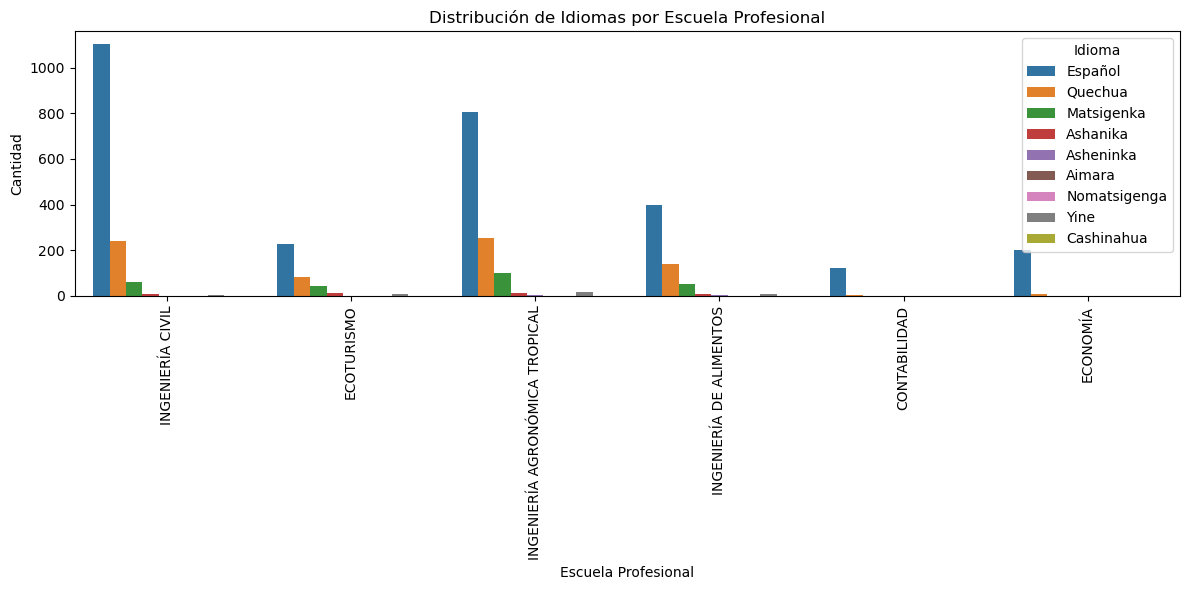

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las columnas de interés
data_filtered = Postulantes[['ESCUELA', 'IDIOMA']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='ESCUELA', hue='IDIOMA', data=data_filtered)
plt.xticks(rotation=90)
plt.title('Distribución de Idiomas por Escuela Profesional')
plt.xlabel('Escuela Profesional')
plt.ylabel('Cantidad')
plt.legend(title='Idioma')
plt.tight_layout()
plt.show()


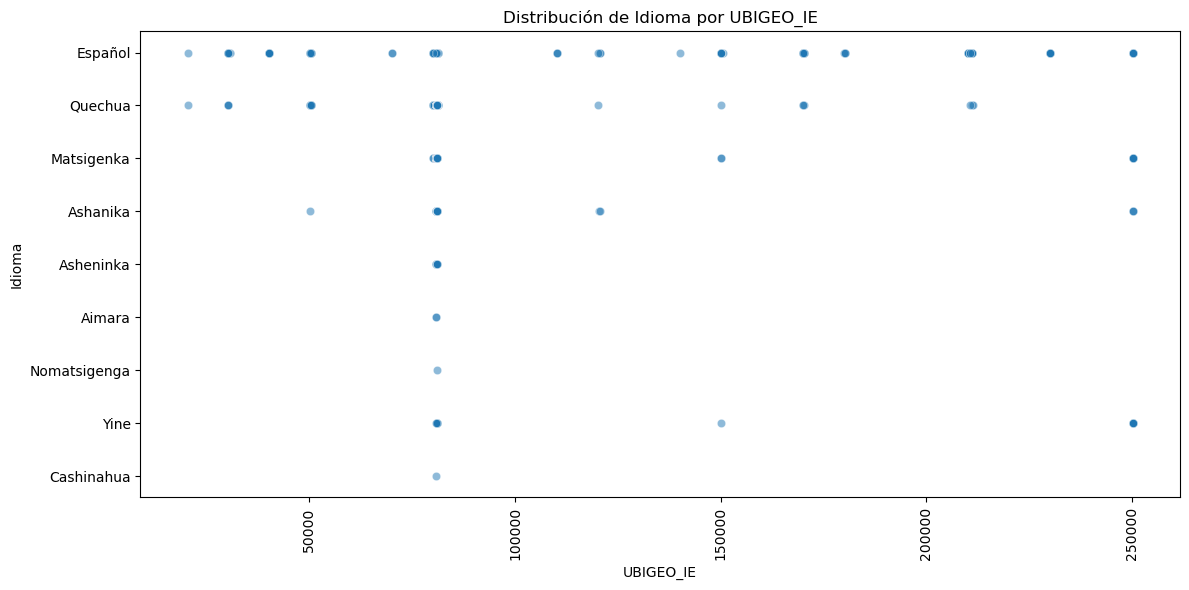

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para aquellos con información de idioma y UBIGEO_IE
data_with_idioma_ubigeo = Postulantes[Postulantes['IDIOMA'].notnull() & (Postulantes['UBIGEO_IE'] != 0)]

# Crear el gráfico de dispersión utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_with_idioma_ubigeo, x='UBIGEO_IE', y='IDIOMA', alpha=0.5)
plt.title('Distribución de Idioma por UBIGEO_IE')
plt.xlabel('UBIGEO_IE')
plt.ylabel('Idioma')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


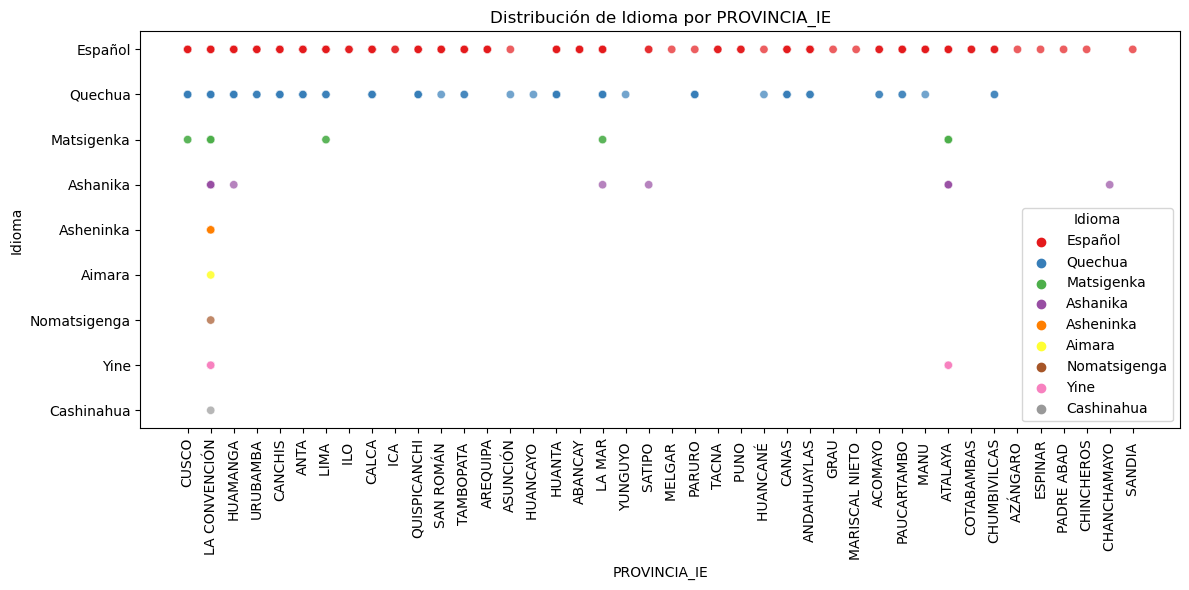

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para aquellos con información de idioma y PROVINCIA_IE
data_with_idioma_provincia = Postulantes[Postulantes['IDIOMA'].notnull() & (Postulantes['PROVINCIA_IE'] != '')]

# Crear el gráfico de dispersión utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_with_idioma_provincia, x='PROVINCIA_IE', y='IDIOMA', hue='IDIOMA', palette='Set1', alpha=0.7)
plt.title('Distribución de Idioma por PROVINCIA_IE')
plt.xlabel('PROVINCIA_IE')
plt.ylabel('Idioma')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Idioma')
plt.show()


In [52]:
import pandas as pd

# Filtrar los datos para aquellos con información de idioma y PROVINCIA_IE
data_with_idioma_provincia = Postulantes[Postulantes['IDIOMA'].notnull() & (Postulantes['PROVINCIA_IE'] != '')]

# Agrupar los datos por región y idioma, y contar la cantidad de postulantes en cada grupo
idioma_por_region = data_with_idioma_provincia.groupby(['PROVINCIA_IE', 'IDIOMA'])['UUID'].count().reset_index()
idioma_por_region.columns = ['Region', 'Idioma', 'Cantidad']

# Ordenar la tabla por cantidad y región
idioma_por_region = idioma_por_region.sort_values(by=['Region', 'Cantidad'], ascending=[True, False])

# Imprimir la tabla
print(idioma_por_region)


         Region   Idioma  Cantidad
0       ABANCAY  Español         5
1       ACOMAYO  Español         3
2       ACOMAYO  Quechua         2
3   ANDAHUAYLAS  Español         8
4   ANDAHUAYLAS  Quechua         3
..          ...      ...       ...
75   TAMBOPATA   Español        16
76   TAMBOPATA   Quechua         2
77     URUBAMBA  Español        28
78     URUBAMBA  Quechua         3
79     YUNGUYO   Quechua         1

[80 rows x 3 columns]


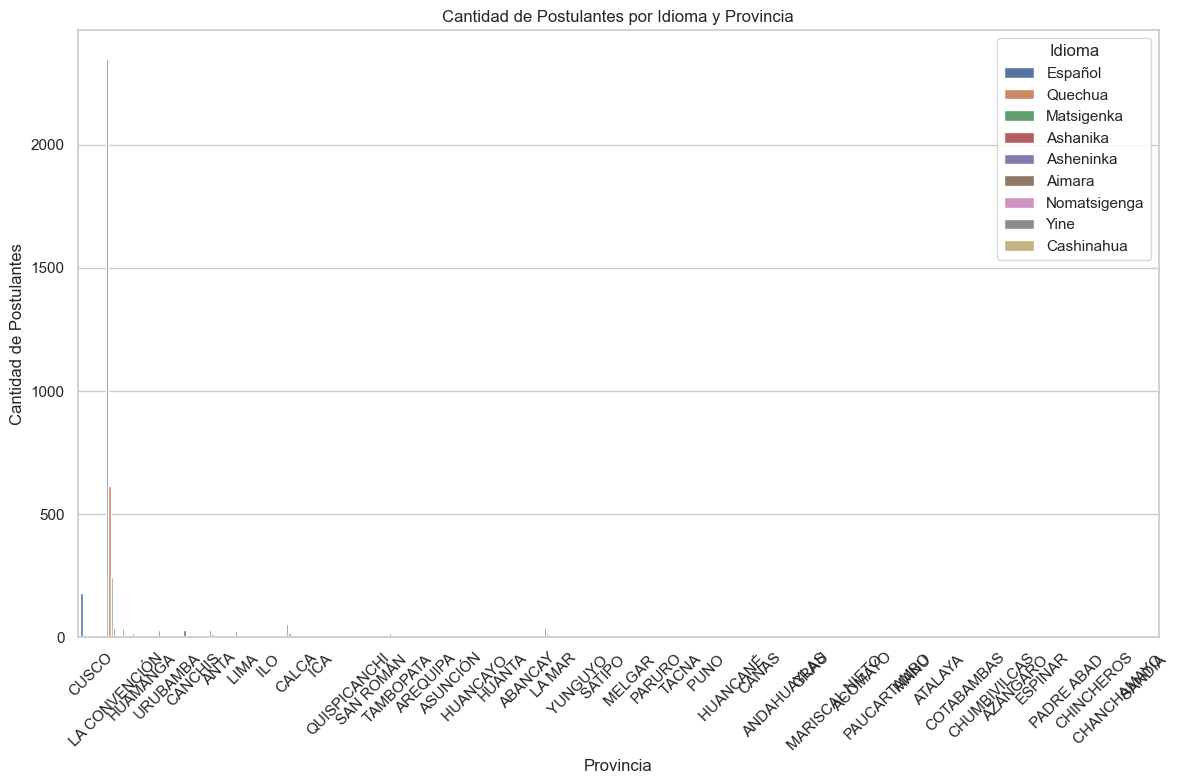

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras agrupadas para contar la cantidad de postulantes por idioma y provincia
plt.figure(figsize=(12, 8))
sns.set_palette("pastel")
sns.set(style="whitegrid")
sns.countplot(data=data_with_idioma_provincia, x='PROVINCIA_IE', hue='IDIOMA')
plt.title("Cantidad de Postulantes por Idioma y Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Postulantes")
plt.xticks(rotation=45)
plt.legend(title='Idioma')
plt.tight_layout()
plt.show()


In [54]:

import plotly.graph_objs as go
import plotly.offline as py

# Agrupar los datos por provincia e idioma y contar la cantidad de postulantes en cada combinación
grouped_data = data_with_idioma_provincia.groupby(['PROVINCIA_IE', 'IDIOMA']).size().reset_index(name='CANTIDAD')

# Crear un gráfico de barras agrupadas
trace = []
idiomas = grouped_data['IDIOMA'].unique()
for idioma in idiomas:
    trace.append(
        go.Bar(
            x=grouped_data[grouped_data['IDIOMA'] == idioma]['PROVINCIA_IE'],
            y=grouped_data[grouped_data['IDIOMA'] == idioma]['CANTIDAD'],
            name=idioma
        )
    )

layout = go.Layout(
    title='Cantidad de Postulantes por Idioma y Provincia',
    xaxis=dict(title='Provincia'),
    yaxis=dict(title='Cantidad de Postulantes'),
    barmode='group'
)

fig = go.Figure(data=trace, layout=layout)
py.iplot(fig)


C:\Users\HP\AppData\Local\Temp\ipykernel_9564\3943220606.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



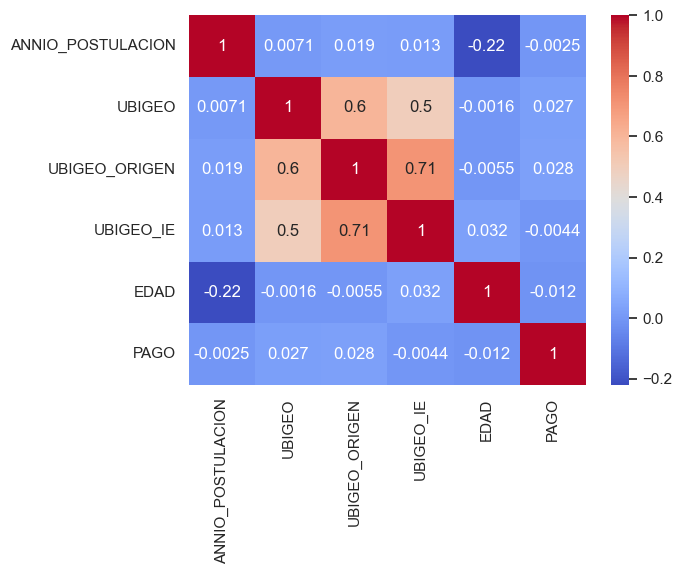

In [56]:
correlation_matrix = Postulantes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


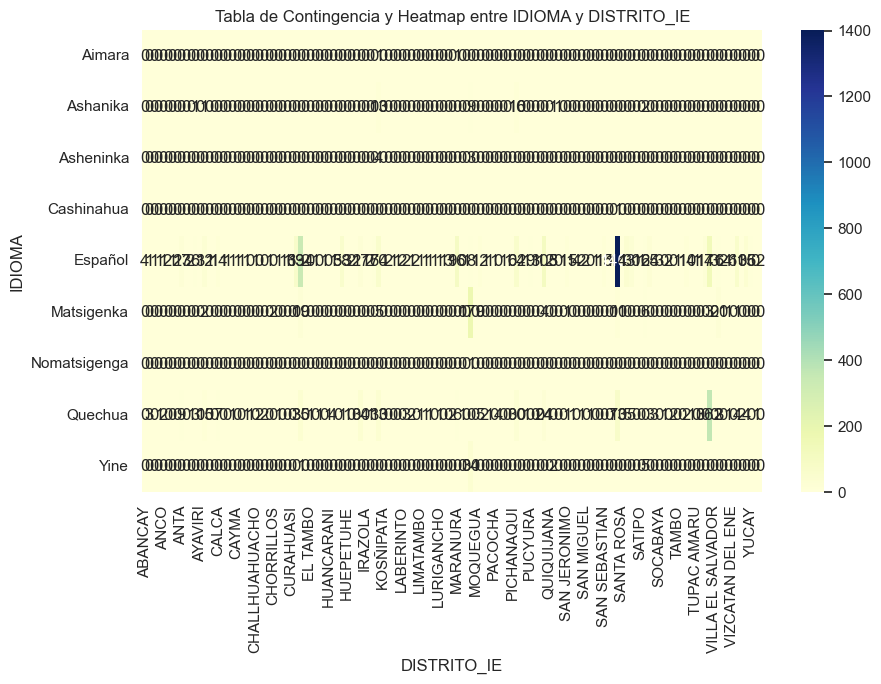

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la tabla de contingencia entre IDIOMA y DISTRITO_IE
contingency_table = pd.crosstab(Postulantes['IDIOMA'], Postulantes['DISTRITO_IE'])

# Generar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Tabla de Contingencia y Heatmap entre IDIOMA y DISTRITO_IE')
plt.xlabel('DISTRITO_IE')
plt.ylabel('IDIOMA')
plt.show()


In [60]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas con variables categóricas
categorical_cols = ['ESCUELA', 'MODALIDAD', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'DEPARTAMENTO_ORIGEN',
                    'PROVINCIA_ORIGEN', 'DISTRITO_ORIGEN', 'DEPARTAMENTO_IE', 'PROVINCIA_IE', 'DISTRITO_IE',
                    'SEXO', 'IDIOMA', 'LEE', 'ESCRIBE', 'HABLA', 'TIENE_DISCAPACIDAD', 'TIPO_COMUNIDAD', 'COMUNIDAD']

# Crear un nuevo DataFrame para las variables codificadas
encoded_data = Postulantes.copy()

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label-Encoding a las variables categóricas
for col in categorical_cols:
    encoded_data[col] = label_encoder.fit_transform(Postulantes[col])

# Mostrar las primeras filas del DataFrame codificado
print(encoded_data.head())


  FECHA_CORTE                                               UUID  ESCUELA  \
0  2023-06-26  eb35ae9c84a9e239398331595b9f5489d23e686ca3f699...        4   
1  2023-06-26  37aa167373b8ddd18910267b616ff845eef0517201f7da...        2   
2  2023-06-26  41b4b33d0e004fc7dc6018664697814b2bfd87d93dafd9...        4   
3  2023-06-26  60d7c1c310363c4b2bf1437aba8ba8df2a6f66cae4e25c...        3   
4  2023-06-26  28a9a7dc2ae0a4c9d17151793585c9cee258418321d11b...        5   

   MODALIDAD  ANNIO_POSTULACION  UBIGEO  DEPARTAMENTO  PROVINCIA  DISTRITO  \
0          7               2020   80901             5         40       162   
1          7               2020   80901             5         40       162   
2          7               2020   80901             5         40       162   
3          7               2020   80901             5         40       162   
4          7               2020   80902             5         40        59   

   UBIGEO_ORIGEN  ...  EDAD  SEXO   PAGO  IDIOMA  LEE  ESCRIBE  HABL

C:\Users\HP\AppData\Local\Temp\ipykernel_9564\2014636366.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



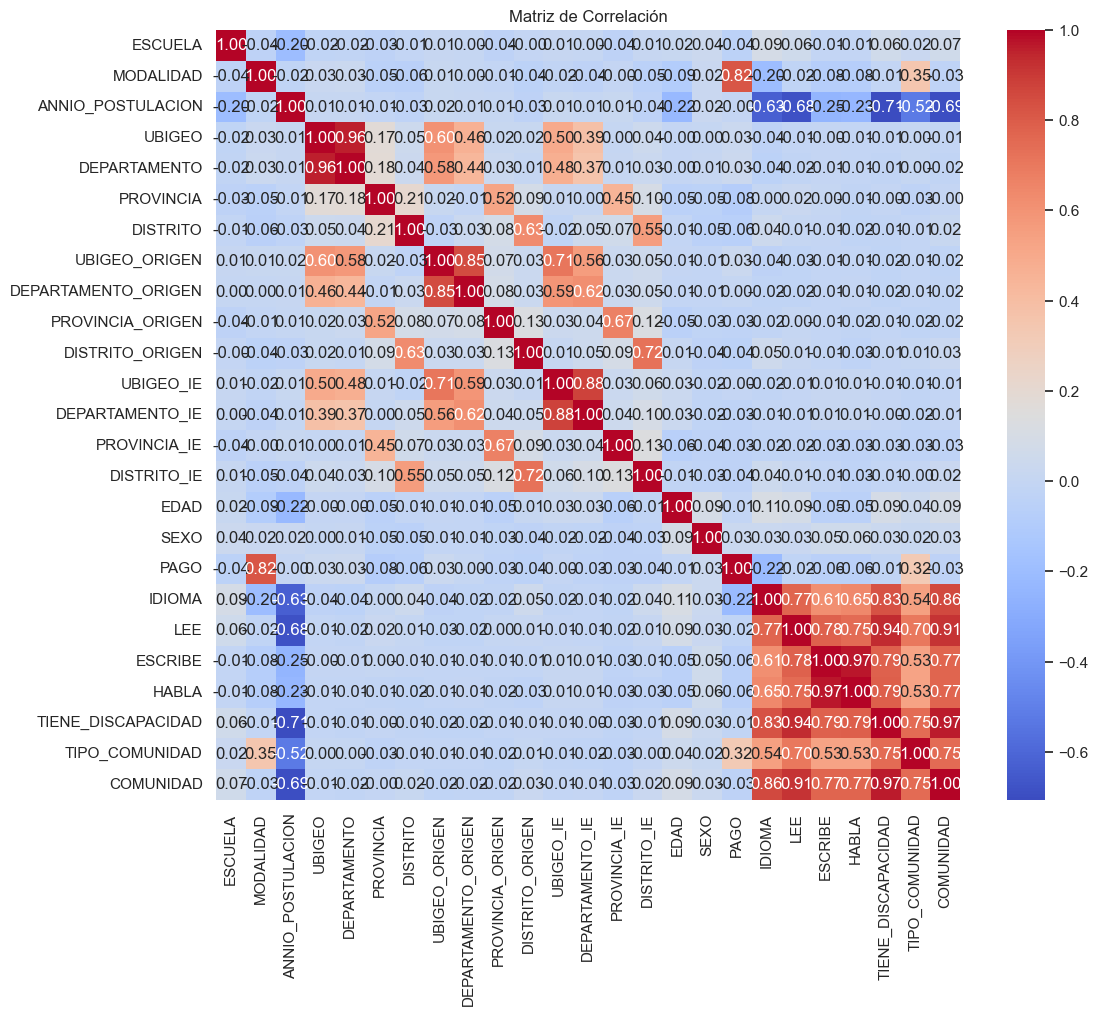

IDIOMA                 1.000000
COMUNIDAD              0.857291
TIENE_DISCAPACIDAD     0.832599
LEE                    0.770108
HABLA                  0.645623
ESCRIBE                0.614474
TIPO_COMUNIDAD         0.544564
EDAD                   0.112486
ESCUELA                0.091456
DISTRITO_ORIGEN        0.049171
DISTRITO               0.041238
DISTRITO_IE            0.040507
SEXO                   0.028512
PROVINCIA              0.001956
DEPARTAMENTO_IE       -0.007331
PROVINCIA_ORIGEN      -0.018710
UBIGEO_IE             -0.018790
DEPARTAMENTO_ORIGEN   -0.019995
PROVINCIA_IE          -0.022921
UBIGEO                -0.037119
UBIGEO_ORIGEN         -0.037369
DEPARTAMENTO          -0.043774
MODALIDAD             -0.200617
PAGO                  -0.216747
ANNIO_POSTULACION     -0.627787
Name: IDIOMA, dtype: float64


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = encoded_data.corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Correlación de la variable IDIOMA con otras variables
correlation_with_idioma = correlation_matrix['IDIOMA'].sort_values(ascending=False)
print(correlation_with_idioma)


C:\Users\HP\AppData\Local\Temp\ipykernel_9564\1797586843.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



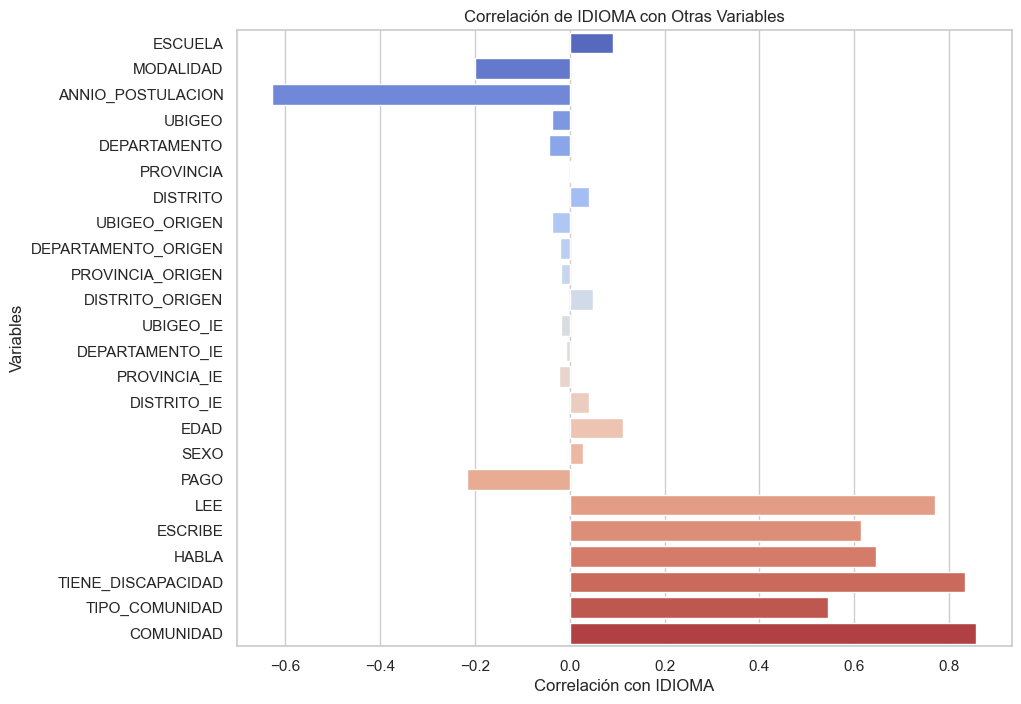

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación de la variable IDIOMA con las demás variables
correlation_with_idioma = encoded_data.corr()['IDIOMA'].drop('IDIOMA')

# Crear un gráfico de barras de la correlación
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_idioma.values, y=correlation_with_idioma.index, palette='coolwarm')
plt.xlabel("Correlación con IDIOMA")
plt.ylabel("Variables")
plt.title("Correlación de IDIOMA con Otras Variables")
plt.show()
